<a href="https://colab.research.google.com/github/RenanYMartins/ADD-Trabalho2/blob/main/Mercado_Imobili%C3%A1rio_de_Nova_York_Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Avaliativa I - Análise de Dados do Mercado Imobiliário de Nova York

## Setup Inicial

Importando bibliotecas e conectando à base de dados.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Análise de Dados/Trabalho I/data/07_mercado_imobiliário_ny.csv')

## Visão Inicial dos Dados

In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


Vemos que os dados representam imóveis à venda disponíveis em Nova Iorque, com as seguintes propriedades:

- `BROKERTITLE`: Título do corretor.
- `TYPE`: Tipo do imóvel.
- `PRICE`: Preço do imóvel.
- `BEDS`: Número de quartos.
- `BATH`: Número de banheiros.
- `PROPERTYSQFT`: Área em $\mathrm{m}^2$.
- `ADDRESS`: Endereço completo.
- `STATE`: Estado (NY).
- `MAIN_ADDRESS`: Endereço principal.
- `ADMINISTRATIVE_AREA_LEVEL_2`: Área administrativa secundária.
- `LOCALITY`: Localidade.
- `SUBLOCALITY`: Sublocalidade.
- `STREET_NAME`: Nome da rua.
- `LONG_NAME`: Nome completo da localização.
- `FORMATTED_ADDRESS`: Endereço formatado.
- `LATITUDE`: Latitude geográfica.
- `LONGITUDE`: Longitude geográfica.

In [ ]:
print(f'A base contém {df.shape[0]} registros e {df.shape[1]} variáveis.')

A base contém 4801 registros e 17 variáveis.


In [ ]:
df.isnull().sum().reset_index().rename(columns={0: "Quantidade de Nulos", "index": "Variável"})

,Variável,Quantidade de Nulos
0,BROKERTITLE,0
1,TYPE,0
2,PRICE,0
3,BEDS,0
4,BATH,0
5,PROPERTYSQFT,0
6,ADDRESS,0
7,STATE,0
8,MAIN_ADDRESS,0
9,ADMINISTRATIVE_AREA_LEVEL_2,0


In [ ]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## Endereço com 0 banheiros? Vejamos!

In [ ]:
df.loc[df['BATH']==0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
2699,Brokered by COMPASS,Pending,675000,3,0.0,2780.000000,41 Warren St Unit Subc,"Manhattan, NY 10007","41 Warren St Unit SubcManhattan, NY 10007",New York,New York County,New York,Manhattan,41,"41 Warren St b, New York, NY 10007, USA",40.714393,-74.008877
2704,Brokered by COMPASS,Pending,675000,3,0.0,2780.000000,41 Warren St Unit Subc,"Manhattan, NY 10007","41 Warren St Unit SubcManhattan, NY 10007",New York,New York County,New York,Manhattan,41,"41 Warren St b, New York, NY 10007, USA",40.714393,-74.008877
3379,Brokered by Brown Harris Stevens,Townhouse for sale,14995000,3,0.0,2184.207862,50 W 86th St Unit Townhouse,"Manhattan, NY 10024","50 W 86th St Unit TownhouseManhattan, NY 10024",United States,New York,New York County,New York,West 86th Street,"50 W 86th St, New York, NY 10024, USA",40.786046,-73.971834


Os _ids_ `2699` e `2704` parecem duplicados. São mesmo?

In [ ]:
df.iloc[2699].equals(df.iloc[2704])

True

Sim! Esses dados estão duplicados! Será que existem mais?

In [ ]:
df[df.duplicated(keep=False)]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
80,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
113,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
114,Brokered by Sowae Corp,Multi-family home for sale,346000,5,2.000000,2184.207862,103-12 104th St,"Ozone Park, NY 11417","103-12 104th StOzone Park, NY 11417",United States,New York,Queens County,Queens,104th Street,"103-12 104th St, Jamaica, NY 11417, USA",40.683789,-73.838104
115,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714
4770,Brokered by Sotheby's International Realty - E...,Condo for sale,2600000,3,2.000000,1729.000000,242 E 15th St Apt 1,"New York, NY 10003","242 E 15th St Apt 1New York, NY 10003",New York,New York County,New York,Manhattan,242,"242 E 15th St APT 1, New York, NY 10003, USA",40.733031,-73.985037
4775,Brokered by EXIT REALTY PREMIER,House for sale,749000,3,2.373861,2002.000000,631 Essex St,"Brooklyn, NY 11208","631 Essex StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Essex Street,"631 Essex St, Brooklyn, NY 11208, USA",40.668173,-73.880027
4780,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714


Vamos remover os dados duplicados, mantendo apenas uma instância de cada um deles.

In [ ]:
df_filtered = df.drop_duplicates()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

In [ ]:
df_filtered.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.587000e+03,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000
mean,2.381172e+06,3.365816,2.377735,2177.712426,40.713932,-73.941584
std,3.206831e+07,2.628808,1.968503,2283.095559,0.087738,0.101276
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638588,-73.987420
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726667,-73.949116
75%,1.498500e+06,4.000000,3.000000,2184.207862,40.771913,-73.869455
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


Parece estranho também um imóvel acima de U$2 bilhões. Seria um registro válido?

In [ ]:
property_most_valued = df_filtered[df_filtered['PRICE'] == df_filtered['PRICE'].max()]
property_most_valued

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0,10000.0,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418


In [ ]:
df_richmond = df_filtered[df_filtered['SUBLOCALITY'] == 'Richmond County']

df_richmond.sort_values(by='PRICE', ascending=False).head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.000000,10000.000000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
2653,Brokered by NEUHAUS REALTY INC.,Multi-family home for sale,10700000,42,43.000000,27152.000000,646-662 Port Richmond Ave,"Staten Island, NY 10302","646-662 Port Richmond AveStaten Island, NY 10302",United States,New York,Richmond County,Staten Island,Port Richmond Avenue,"646 Port Richmond Ave, Staten Island, NY 10302...",40.627671,-74.142352
3524,Brokered by Corcoran Brooklyn Heights,House for sale,6700000,3,2.373861,2184.207862,450 Front St,"Staten Island, NY 10304","450 Front StStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Front Street,"450 Front St, Staten Island, NY 10304, USA",40.626225,-74.074564
1295,Brokered by Joanne Costa Realty,Multi-family home for sale,3995000,3,2.373861,12200.000000,639 Tompkins Ave,"Staten Island, NY 10305","639 Tompkins AveStaten Island, NY 10305",United States,New York,Richmond County,Staten Island,Tompkins Avenue,"639 Tompkins Ave., Staten Island, NY 10305, USA",40.610728,-74.070161


Aqui ficou claro que o outlier de preço é um registro errado, já que casas da mesma área com mais quartos, metros quadrados e banheiros têm um preço muito menor. Agora, vamos investigar o outlier da metragem.

Há outros imóveis do tipo que têm uma área maior, então não parece ser outro caso de registro errado. Agora, vamos limpar a base do registro errado.

In [ ]:
df_filtered = df_filtered[df_filtered['PRICE'] != 2147483647]

In [ ]:
df_filtered.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.586000e+03,4586.000000,4586.000000,4586.000000,4586.000000,4586.000000
mean,1.913421e+06,3.365024,2.376945,2176.006738,40.713975,-73.941523
std,4.979040e+06,2.628547,1.967990,2280.419696,0.087700,0.101201
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638624,-73.987387
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726691,-73.949116
75%,1.497250e+06,4.000000,3.000000,2184.207862,40.771913,-73.869418
max,1.950000e+08,50.000000,50.000000,65535.000000,40.912729,-73.702450


## Visualizações

### Histogramas

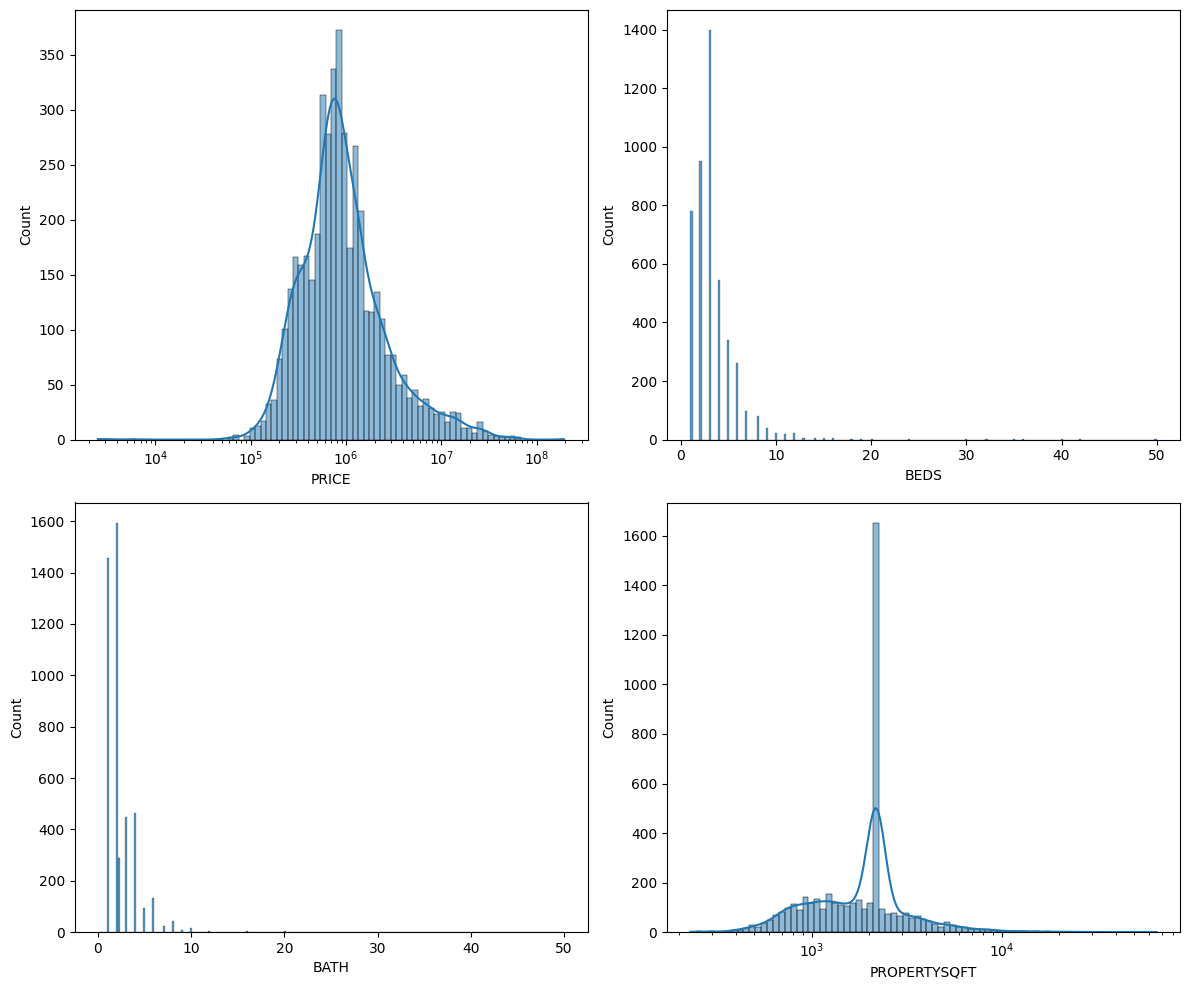

In [ ]:
cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axs_flat = axs.flatten()

for idx, col in enumerate(cols):
    sns.histplot(
        data=df_filtered[col],
        ax=axs_flat[idx],
        log_scale=True if col == 'PRICE' or col == 'PROPERTYSQFT' else False,
        kde=True if col == 'PRICE' or col == 'PROPERTYSQFT' else False
    )

plt.tight_layout()
plt.show()

### Boxplot

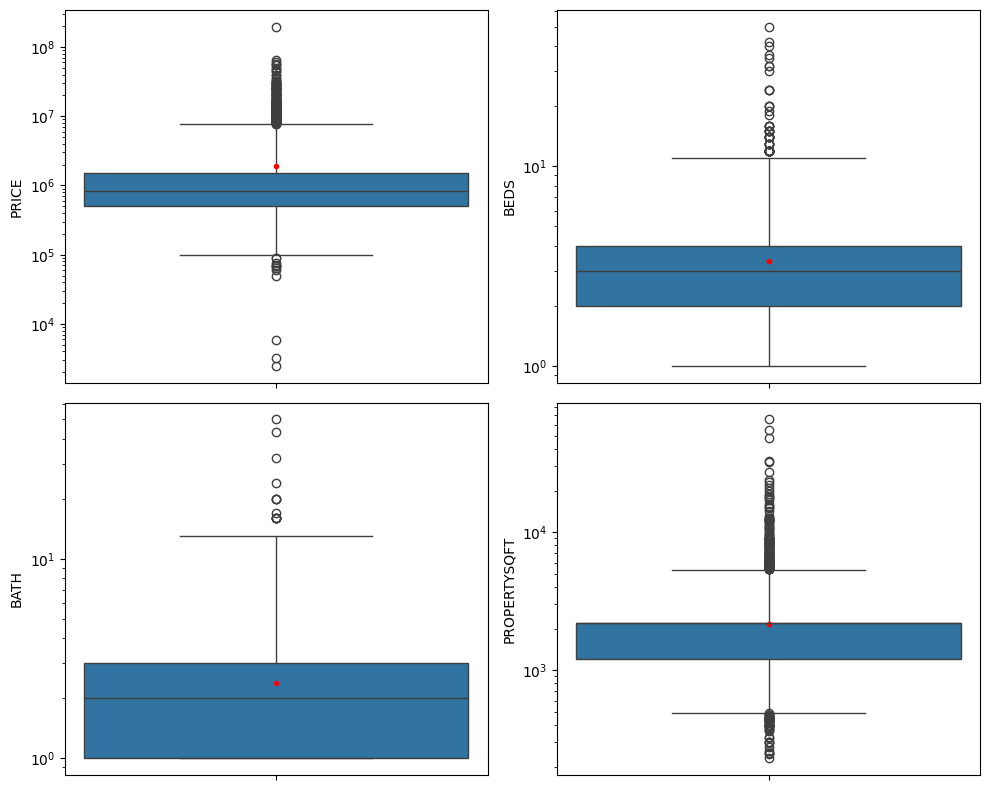

In [ ]:
cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs_flat = axs.flatten()

for idx, col in enumerate(cols):
    sns.boxplot(
        data=df_filtered[col],
        ax=axs_flat[idx],
        log_scale=True,
    )
    axs_flat[idx].plot(df_filtered[col].mean(), 'r.')

plt.tight_layout()
plt.show()

### Matriz de Correlação

In [ ]:
corr = df_filtered.select_dtypes(include='number').corr()

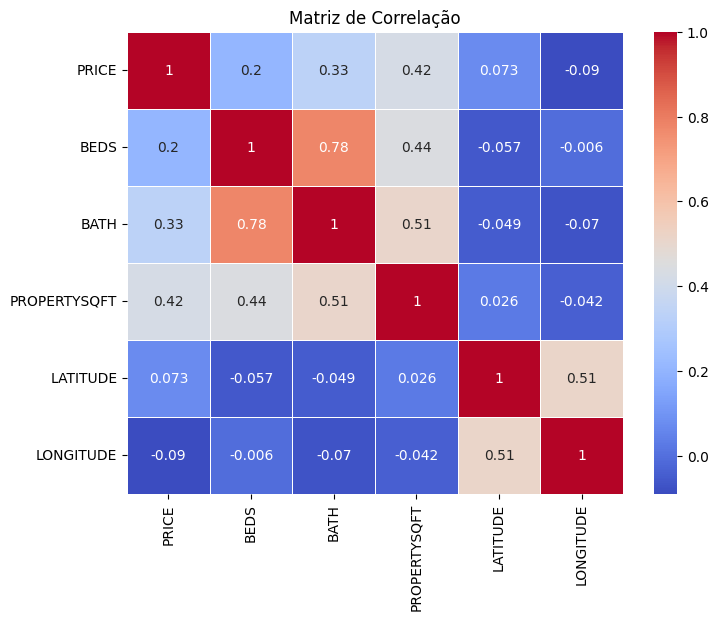

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Matriz de Correlação')
plt.show()

Há uma correlação aparentemente forte entre a área do imóvel, o número de quartos e banheiros, o que faz muito sentido.

## Análise aprofundada: `PROPERTYSQFT`

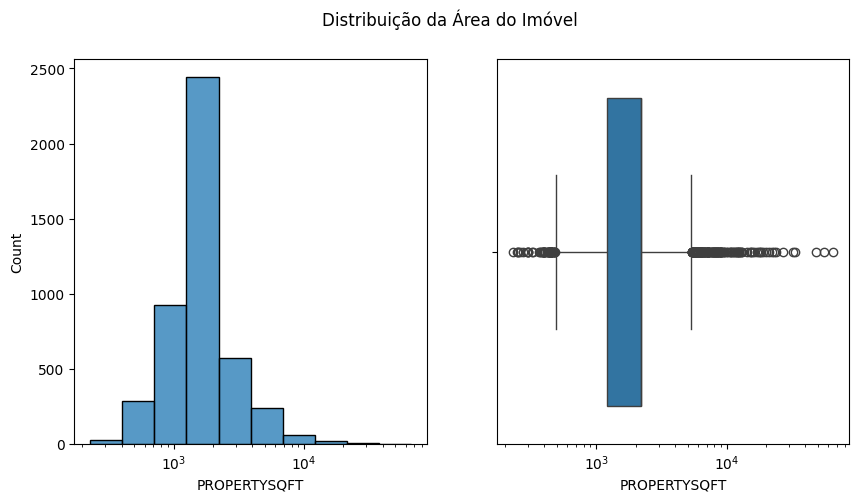

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(df_filtered['PROPERTYSQFT'], ax=axs[0], log_scale=True, bins=10)
sns.boxplot(df_filtered['PROPERTYSQFT'], ax=axs[1], log_scale=True, orient='h')
fig.suptitle('Distribuição da Área do Imóvel')

plt.show()

In [ ]:
df_filtered['PROPERTYSQFT'].max()

65535.0

O valor máximo em `PROPERTYSQFT` (65535) é o maior valor possível para um _inteiro de 16 bits sem sinal_. Dessa forma, pode ser um erro.

## Análise aprofundada: `TYPE`

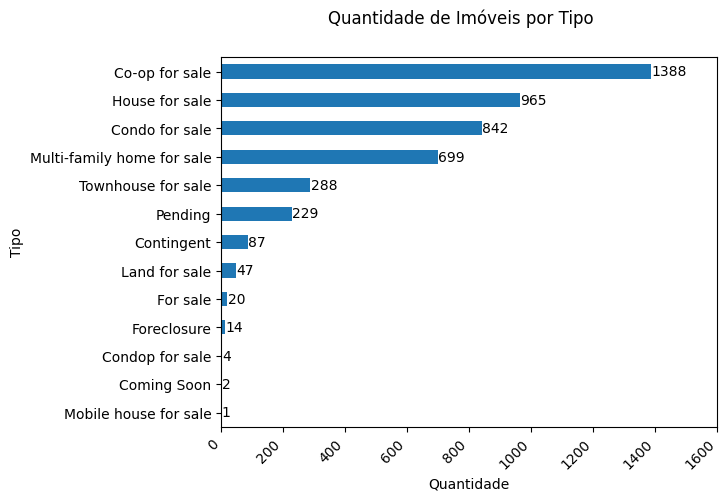

In [ ]:
types = df_filtered.groupby('TYPE').agg({
    'PRICE': 'count',
}).reset_index().rename(columns={'PRICE': 'Quantidade'}).sort_values(by='Quantidade', ascending=False)

ax = types.plot(
    kind='barh',
    x='TYPE',
    y='Quantidade',
    legend=False
)

ax.invert_yaxis()
ax.set_xlim(0, 1600)

for i, (index, row) in enumerate(types.iterrows()):
    ax.text(row['Quantidade'] + 1, i, str(row['Quantidade']), va='center')

plt.xticks(rotation=45, ha='right')
plt.suptitle('Quantidade de Imóveis por Tipo')
plt.xlabel('Quantidade')
plt.ylabel('Tipo')

plt.show()

In [ ]:
df_filtered.groupby('TYPE').agg({
    'PRICE': 'count',
}).reset_index().rename(columns={'PRICE': 'Quantidade'}).sort_values(by='Quantidade', ascending=False)

,TYPE,Quantidade
0,Co-op for sale,1388
7,House for sale,965
2,Condo for sale,842
10,Multi-family home for sale,699
12,Townhouse for sale,288
11,Pending,229
4,Contingent,87
8,Land for sale,47
5,For sale,20
6,Foreclosure,14


## Análise aprofundade: `SUBLOCALITY`

In [ ]:
df_filtered.reset_index(inplace=True)
df_filtered = df_filtered.drop(['index'], axis=1)
df_filtered.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
import plotly.express as px

fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="SUBLOCALITY",
    zoom=9.5,
    height=600
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Existem dezenas de sublocalidades no conjunto, o que dificulta a análise. Contudo, Nova Iorque é dividida em 5 grandes condados: *New York County*, *Kings County*, *Queens County*, *Bronx County* e *Richmond County*. Vamos então adicionar uma coluna `COUNTY` para tentar resolver a alta quantidade de sublocalidades.

In [ ]:
def map_to_county(sublocality):
    if pd.isna(sublocality):
        return None

    name = sublocality.lower()

    if any(k in name for k in ['manhattan', 'new york county', 'upper east', 'upper west', 'midtown', 'harlem', 'soho', 'tribeca', 'financial district']):
        return 'New York'
    elif any(k in name for k in ['brooklyn', 'kings county', 'fort hamilton', 'bay ridge', 'dyker heights', 'bensonhurst', 'flatbush', 'bushwick', 'williamsburg', 'park slope', 'coney island', 'bedford-stuyvesant']):
        return 'Kings'
    elif any(k in name for k in ['queens', 'queens county', 'flushing', 'jamaica', 'astoria', 'long island city', 'forest hills', 'rego park', 'far rockaway']):
        return 'Queens'
    elif any(k in name for k in ['bronx', 'bronx county', 'east bronx', 'west bronx', 'mott haven', 'fordham', 'riverdale', 'pelham bay', 'throggs neck', 'co-op city']):
        return 'Bronx'
    elif any(k in name for k in ['staten island', 'richmond county', 'st. george', 'tottenville', 'great kills', 'new dorp', 'stapleton']):
        return 'Richmond'
    else:
        return 'Outros'

df_filtered['COUNTY'] = df_filtered['SUBLOCALITY'].apply(map_to_county)

In [ ]:
fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="COUNTY",
    hover_data=[df_filtered.index],
    zoom=9.5,
    height=600
)


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Agora colorindo os pontos por condado, percebemos que algumas entradas, apesar de claramente pertencerem à um condado, foram atribuídas como `Outros`. Podemos utilizar o algoritmo *K-Nearest Neighbors* — KNN — ou *K Vizinhos Mais Próximos*, que classifica um dado baseado nas *k* entradas mais próximas.

In [ ]:
from collections import Counter
from sklearn.neighbors import NearestNeighbors

# Dados com COUNTY conhecido
df_known = df_filtered[df_filtered['COUNTY'] != 'Outros']
X_known = df_known[['LATITUDE', 'LONGITUDE']]

# Dados com COUNTY desconhecido
df_unknown = df_filtered[df_filtered['COUNTY'] == 'Outros']
X_unknown = df_unknown[['LATITUDE', 'LONGITUDE']]

nn = NearestNeighbors(n_neighbors=2, metric='haversine', algorithm="ball_tree")
nn.fit(X_known)

# Buscar o vizinho mais próximo
dist, indices = nn.kneighbors(X_unknown)

# Obter os counties previstos
predicted_counties = []
for neighbor_indices in indices:
    neighbor_counties = df_known.iloc[neighbor_indices]['COUNTY'].values
    most_common = Counter(neighbor_counties).most_common(1)[0][0]
    predicted_counties.append(most_common)

# Atribuir coluna PREDICTED_COUNTY (somente onde COUNTY está ausente)
df_filtered.loc[df_filtered['COUNTY'] == 'Outros', 'PREDICTED_COUNTY'] = predicted_counties

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="PREDICTED_COUNTY",
    hover_data=[df_filtered.index, "COUNTY", "PREDICTED_COUNTY"],
    zoom=9.5,
    height=600
)

fig.add_trace(go.Scattermap(
    mode="markers",
    lon=df_known['LONGITUDE'],
    lat=df_known['LATITUDE'],
    marker={'size': 3, 'color': 'black', 'symbol': 'circle'},
    text=df_known['COUNTY'],
    showlegend=False,
    customdata=df_known['COUNTY'],
    hovertemplate='County: %{customdata}<extra></extra>'
))

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [ ]:
df_filtered.loc[[1065, 1198, 3384], 'PREDICTED_COUNTY'] = 'New York'
df_filtered.iloc[[1065, 1198, 3384]]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,COUNTY,PREDICTED_COUNTY
1065,Brokered by Coldwell Banker M&D Good Life,Co-op for sale,324900,1,1.0,900.0,251 Seaman Ave Apt 1C,"New York, NY 10034","251 Seaman Ave Apt 1CNew York, NY 10034",New York,New York County,New York,Manhattan,251,"251 Seaman Ave #1c, New York, NY 10034, USA",40.871644,-73.917848,Outros,New York
1198,Brokered by New Heights Realty,Co-op for sale,249000,3,1.0,500.0,100 Park Terrace Ter W Unit 1H,"New York, NY 10034","100 Park Terrace Ter W Unit 1HNew York, NY 10034",New York,New York County,New York,Manhattan,100,"100 Park Terrace W #1h, New York, NY 10034, USA",40.871796,-73.916064,Outros,New York
3384,Brokered by New Heights Realty,Co-op for sale,324900,1,1.0,665.0,90 Park Terrace Ter E Unit 3A,"New York, NY 10034","90 Park Terrace Ter E Unit 3ANew York, NY 10034",New York,New York County,New York,Manhattan,90,"90 Park Terrace E #3a, New York, NY 10034, USA",40.870904,-73.915568,Outros,New York


In [ ]:
df_filtered.loc[df_filtered['COUNTY'] == 'Outros', 'COUNTY'] = df_filtered.loc[df_filtered['COUNTY'] == 'Outros', 'PREDICTED_COUNTY']

In [ ]:
fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="COUNTY",
    hover_data=[df_filtered.index],
    zoom=9.5,
    height=600
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [ ]:
df_filtered.loc[324, 'COUNTY'] = 'Bronx'
df_filtered.loc[3613, 'COUNTY'] = 'Queens'

In [ ]:
fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="COUNTY",
    hover_data=[df_filtered.index],
    zoom=9.5,
    height=600
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [ ]:
df_filtered['PRICE_LOG'] = np.log10(df_filtered['PRICE'])

In [ ]:
fig = px.scatter_map(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="PRICE_LOG",
    size="PROPERTYSQFT",
    hover_data=["PRICE", "BEDS", "BATH", "PRICE_LOG",],
    zoom=9.5,
    height=600,
    color_continuous_scale="Cividis_r"
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

## Análise de Preços por Região

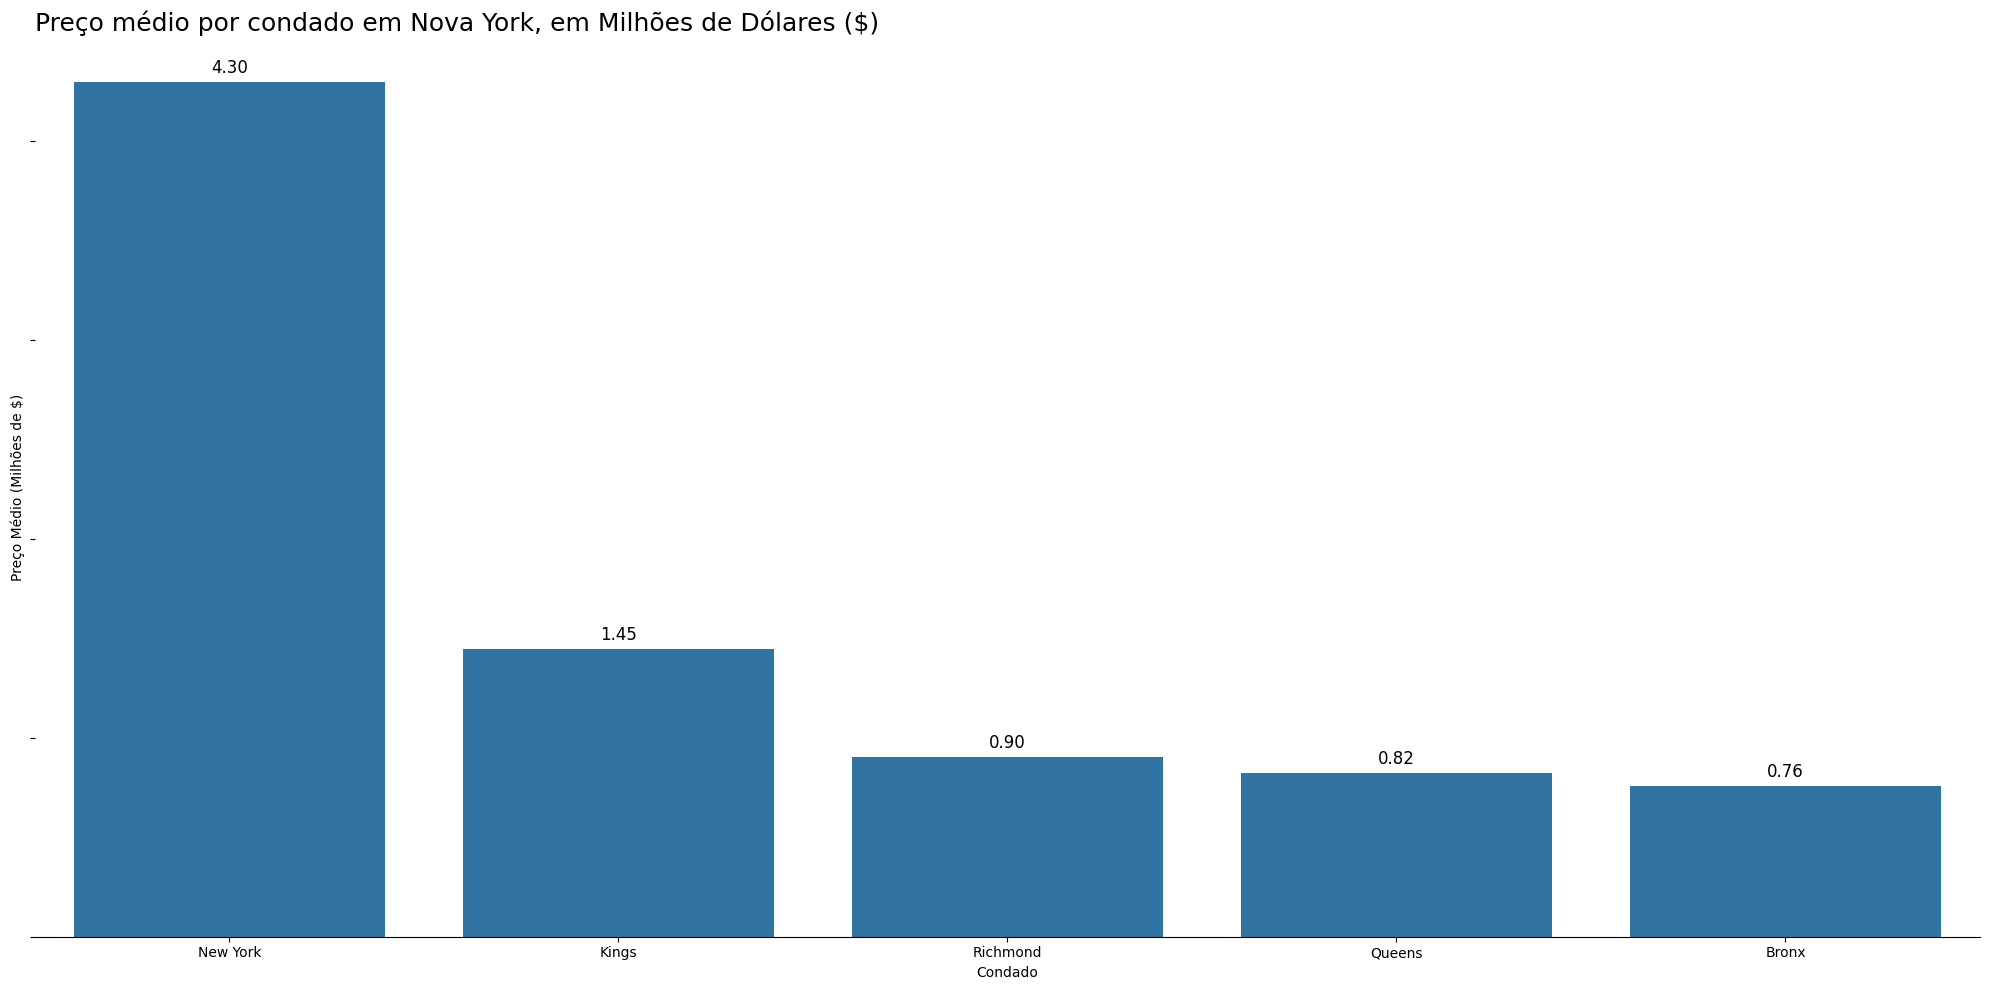

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

preco_medio = df_filtered.groupby('COUNTY')['PRICE'].mean().sort_values(ascending=False)

preco_medio = preco_medio.reset_index()

sns.barplot(
    x='COUNTY',
    y='PRICE',
    data=preco_medio,
    ax=ax,
)

ax.set_title('Preço médio por condado em Nova York, em Milhões de Dólares ($)', loc='left', fontsize=18)
ax.set_xlabel('Condado')
ax.set_ylabel('Preço Médio (Milhões de $)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False)
ax.grid(False)

for i in range(preco_medio.shape[0]):
    ax.text(
        i,
        preco_medio['PRICE'][i] + preco_medio['PRICE'].max()*.01,
        f"{preco_medio['PRICE'][i]/1000000:.2f}",
        fontsize=12,
        color='black',
        ha='center'
    )


plt.tight_layout()
plt.show()

### Imóveis mais valorizados

In [ ]:
imoveis_valorizados = df_filtered.sort_values(by='PRICE', ascending=False)

imoveis_valorizados.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,COUNTY,PREDICTED_COUNTY,PRICE_LOG
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,New York,nan,8.290035
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317,New York,nan,7.812913
1043,Brokered by COMPASS,Co-op for sale,60000000,8,8.000000,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,New York County,New York,Manhattan,960,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247,New York,New York,7.778151
138,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,56000000,11,10.000000,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,New York,New York County,New York,West 54th Street,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191,New York,nan,7.748188
98,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.000000,12000.000000,25 Riverside Dr,"New York, NY 10023","25 Riverside DrNew York, NY 10023",United States,New York,New York County,New York,Riverside Drive,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632,New York,nan,7.740363
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,New York,nan,7.740363
606,"Brokered by Nest Seekers International, Midtown",Condo for sale,50000000,6,6.000000,6569.000000,100 Vandam St Apt 20A,"New York, NY 10013","100 Vandam St Apt 20ANew York, NY 10013",New York,New York County,New York,Manhattan,100,"100 Vandam St #20a, New York, NY 10013, USA",40.726633,-74.008832,New York,New York,7.698970
1405,Brokered by Corcoran East Side,Co-op for sale,48000000,5,2.373861,2184.207862,740 Park Ave # 4 & 5B,"New York, NY 10021","740 Park Ave # 4 & 5BNew York, NY 10021",New York,New York County,New York,Manhattan,740,"740 Park Ave #5, New York, NY 10021, USA",40.770752,-73.964528,New York,New York,7.681241
3259,Brokered by Sotheby's International Realty - E...,Co-op for sale,45000000,5,2.373861,2184.207862,4 E 66th St Fl 7,"New York, NY 10065","4 E 66th St Fl 7New York, NY 10065",New York,New York County,New York,Manhattan,4,"4 E 66th St Fl 7, New York, NY 10065, USA",40.768301,-73.969734,New York,New York,7.653213
3431,Brokered by Sotheby's International Realty - E...,Co-op for sale,44500000,5,6.000000,2184.207862,2 E 67th St Fl 9,"New York, NY 10065","2 E 67th St Fl 9New York, NY 10065",New York,New York County,New York,Manhattan,2,"2 E 67th St Fl 9, New York, NY 10065, USA",40.768973,-73.969136,New York,New York,7.648360


### Imóveis menos valorizados


In [ ]:
imoveis_menos_valorizados = df_filtered.sort_values(by='PRICE', ascending=True)

imoveis_menos_valorizados.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,COUNTY,PREDICTED_COUNTY,PRICE_LOG
304,Brokered by Living NY - Main Office,For sale,2494,2,1.000000,2184.207862,635 W 170th St Apt 4F,"New York, NY 10032","635 W 170th St Apt 4FNew York, NY 10032",New York,New York County,New York,Manhattan,635,"635 W 170th St #4f, New York, NY 10032, USA",40.843406,-73.940795,New York,New York,3.396896
297,Brokered by Living NY - Main Office,For sale,3225,3,1.000000,2184.207862,635 W 170th St Apt 2C,"New York, NY 10032","635 W 170th St Apt 2CNew York, NY 10032",New York,New York County,New York,Manhattan,635,"635 W 170th St #2c, New York, NY 10032, USA",40.843406,-73.940795,New York,New York,3.508530
346,Brokered by Century 21 Realty First,Land for sale,5800,3,2.373861,2184.207862,4515 Avenue N Lot 5,"Brooklyn, NY 11234","4515 Avenue N Lot 5Brooklyn, NY 11234",New York,Kings County,Brooklyn,Flatlands,4515,"4515 Avenue N #5, Brooklyn, NY 11234, USA",40.618915,-73.931211,Kings,nan,3.763428
448,Brokered by Morris Park Realty Group,Co-op for sale,49500,3,2.373861,800.000000,150 City Island Ave Unit E3,"Bronx, NY 10464","150 City Island Ave Unit E3Bronx, NY 10464",New York,Bronx County,The Bronx,City Island,150,"150 City Island Ave #3e, Bronx, NY 10464, USA",40.843284,-73.784603,Bronx,nan,4.694605
949,Brokered by COMPASS,Condo for sale,60000,3,1.000000,445.000000,2 E 55th St Unit 809W35,"Manhattan, NY 10022","2 E 55th St Unit 809W35Manhattan, NY 10022",New York,New York County,New York,Manhattan,2,"2 E 55th St 809 35, New York, NY 10022, USA",40.761398,-73.974613,New York,New York,4.778151
184,Brokered by All American Realty Management,For sale,65000,3,1.000000,230.000000,1287266 45 Madison St Unit 1,"Manhattan, NY 10038","1287266 45 Madison St Unit 1Manhattan, NY 10038",New York,New York County,New York,Manhattan,45,"45 Madison St #1, New York, NY 10038, USA",40.712070,-73.998326,New York,New York,4.812913
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,New York,nan,4.838849
243,Brokered by BESMATCH REAL ESTATE,Co-op for sale,69000,1,1.000000,850.000000,1185 Anderson Ave Apt 2E,"Bronx, NY 10452","1185 Anderson Ave Apt 2EBronx, NY 10452",New York,Bronx County,The Bronx,Highbridge,1185,"1185 Anderson Ave #2e, Bronx, NY 10452, USA",40.836662,-73.923959,Bronx,nan,4.838849
129,Brokered by Utopia Real Estate,Co-op for sale,69900,2,1.000000,700.000000,61 Edgewater Park Unit B,"Bronx, NY 10465","61 Edgewater Park Unit BBronx, NY 10465",United States,New York,Bronx County,The Bronx,Edgewater Park,"61 Edgewater Park, Bronx, NY 10465, USA",40.822499,-73.811157,Bronx,nan,4.844477
3834,Brokered by Prestige Homes Ny Inc,Land for sale,75000,3,2.373861,2184.207862,199th St,"Saint Albans, NY 11412","199th StSaint Albans, NY 11412",11412,United States,New York,Queens County,Jamaica,"199th St, Jamaica, NY 11412, USA",40.694216,-73.753090,Queens,Queens,4.875061


### Venda por Tipo de Imóvel

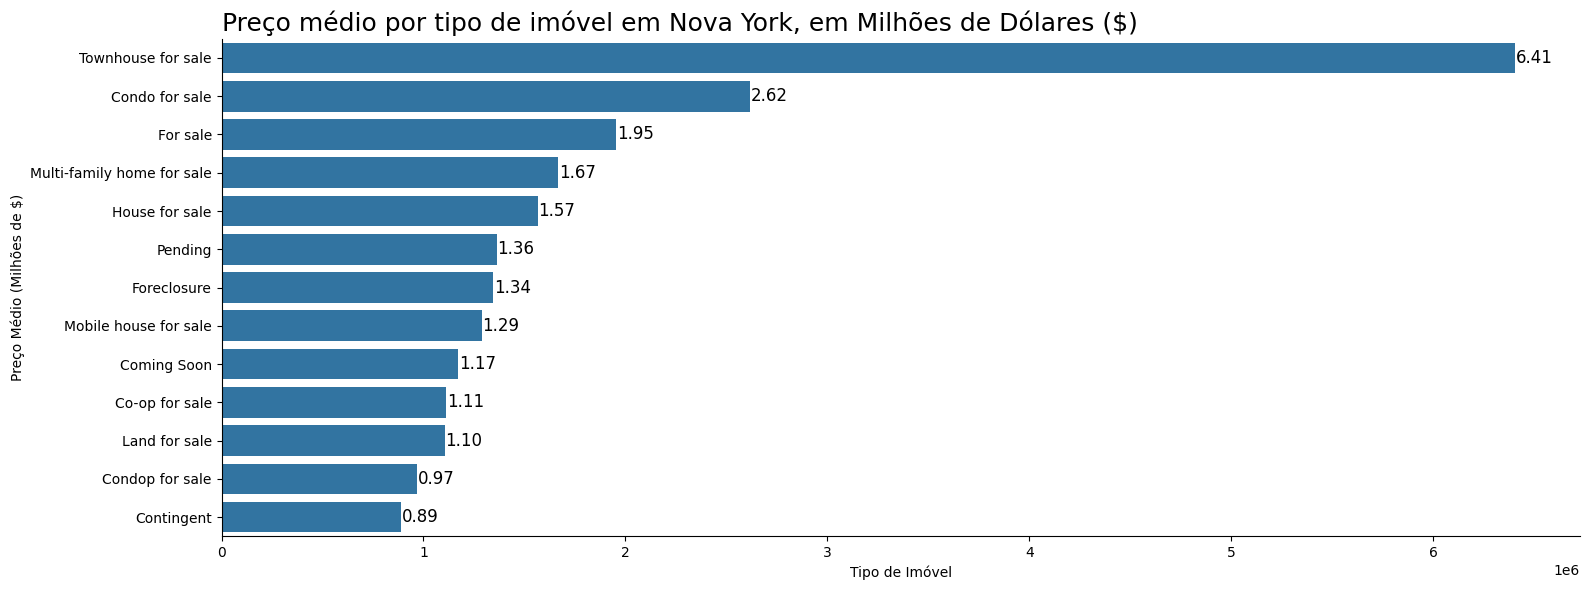

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))

preco_medio = df_filtered.groupby('TYPE')['PRICE'].mean().sort_values(ascending=False)

preco_medio = preco_medio.reset_index()

sns.barplot(
    y='TYPE',
    x='PRICE',
    data=preco_medio,
    ax=ax,
    orient='h'
)

ax.set_title('Preço médio por tipo de imóvel em Nova York, em Milhões de Dólares ($)', loc='left', fontsize=18)
ax.set_xlabel('Tipo de Imóvel')
ax.set_ylabel('Preço Médio (Milhões de $)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

for i in range(preco_medio.shape[0]):
    ax.text(
        preco_medio['PRICE'][i] + preco_medio['PRICE'].max()*.015,
        i,
        f"{preco_medio['PRICE'][i]/1000000:.2f}",
        fontsize=12,
        color='black',
        ha='center',
        va='center'
    )


plt.tight_layout()
plt.show()

In [ ]:
townhouses = df_filtered[df_filtered['TYPE'].str.contains('Townhouse', case=False, na=False)]

townhouses_por_preco = townhouses.sort_values(by='PRICE', ascending=False)

townhouses_por_preco.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,COUNTY,PREDICTED_COUNTY,PRICE_LOG
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317,New York,nan,7.812913
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,New York,nan,7.740363
177,Brokered by COMPASS,Townhouse for sale,39995000,4,2.373861,10582.000000,145 Reade St,"Manhattan, NY 10013","145 Reade StManhattan, NY 10013",United States,New York,New York County,New York,Reade Street,"145 Reade St, New York, NY 10013, USA",40.716422,-74.010120,New York,nan,7.602006
611,Brokered by Sotheby's International Realty - D...,Townhouse for sale,29950000,10,13.000000,8750.000000,26 Washington Sq N,"New York, NY 10011","26 Washington Sq NNew York, NY 10011",United States,New York,New York County,New York,Washington Square West,"26 Washington Square W, New York, NY 10011, USA",40.732221,-73.998628,New York,nan,7.476397
213,Brokered by CHRISTIE'S INT.REAL ESTATE GROUP,Townhouse for sale,29200000,12,10.000000,11638.000000,123 E 35th St,"New York, NY 10016","123 E 35th StNew York, NY 10016",United States,New York,New York County,New York,East 35th Street,"123 E 35th St, New York, NY 10016, USA",40.747472,-73.979679,New York,nan,7.465383
584,Brokered by Peter Ashe Real Estate- Peter Ashe...,Townhouse for sale,28500000,7,9.000000,12300.000000,14 E 69th St Unit Townhouse,"New York, NY 10021","14 E 69th St Unit TownhouseNew York, NY 10021",United States,New York,New York County,New York,East 69th Street,"14 E 69th St, New York, NY 10021, USA",40.769934,-73.967507,New York,nan,7.454845
1915,"Brokered by Garfield, Leslie J. & Co., Inc.",Townhouse for sale,27000000,5,7.000000,2184.207862,64-66 Bedford St,"New York, NY 10014","64-66 Bedford StNew York, NY 10014",United States,New York,New York County,New York,Bedford Street,"64 Bedford St, New York, NY 10014, USA",40.731228,-74.004615,New York,nan,7.431364
2892,Brokered by Serhant,Townhouse for sale,26000000,8,6.000000,10940.000000,23 E 67th St,"New York, NY 10065","23 E 67th StNew York, NY 10065",United States,New York,New York County,New York,East 67th Street,"23 E 67th St, New York, NY 10065, USA",40.768870,-73.967875,New York,nan,7.414973
756,Brokered by Sotheby's International Realty - D...,Townhouse for sale,25500000,5,2.373861,2184.207862,763 Greenwich St,"New York, NY 10014","763 Greenwich StNew York, NY 10014",United States,New York,New York County,New York,Greenwich Street,"763 Greenwich St, New York, NY 10014, USA",40.736118,-74.006487,New York,nan,7.406540
889,Brokered by COMPASS,Townhouse for sale,25000000,7,2.373861,20000.000000,11 Hubert St,"Manhattan, NY 10013","11 Hubert StManhattan, NY 10013",United States,New York,New York County,New York,Hubert Street,"11 Hubert St, New York, NY 10013, USA",40.721329,-74.009256,New York,nan,7.397940


Como _townhouses_ têm um valor médio mais significativo com relação aos outros tipos de imóveis, agora investigaremos a matriz de correlação para tentar identificar algum padrão.

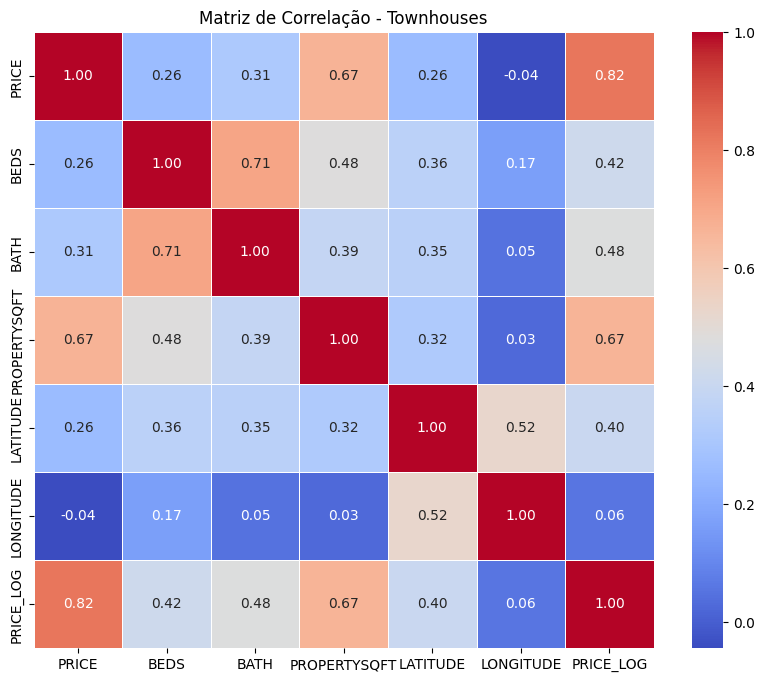

In [ ]:
townhouses = df_filtered[df_filtered['TYPE'].str.contains('Townhouse', case=False, na=False)]

corr_townhouse = townhouses.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_townhouse,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt='.2f'
)
plt.title('Matriz de Correlação - Townhouses')
plt.show()


E os outros tipos de imóveis, teriam as mesmas correlações?

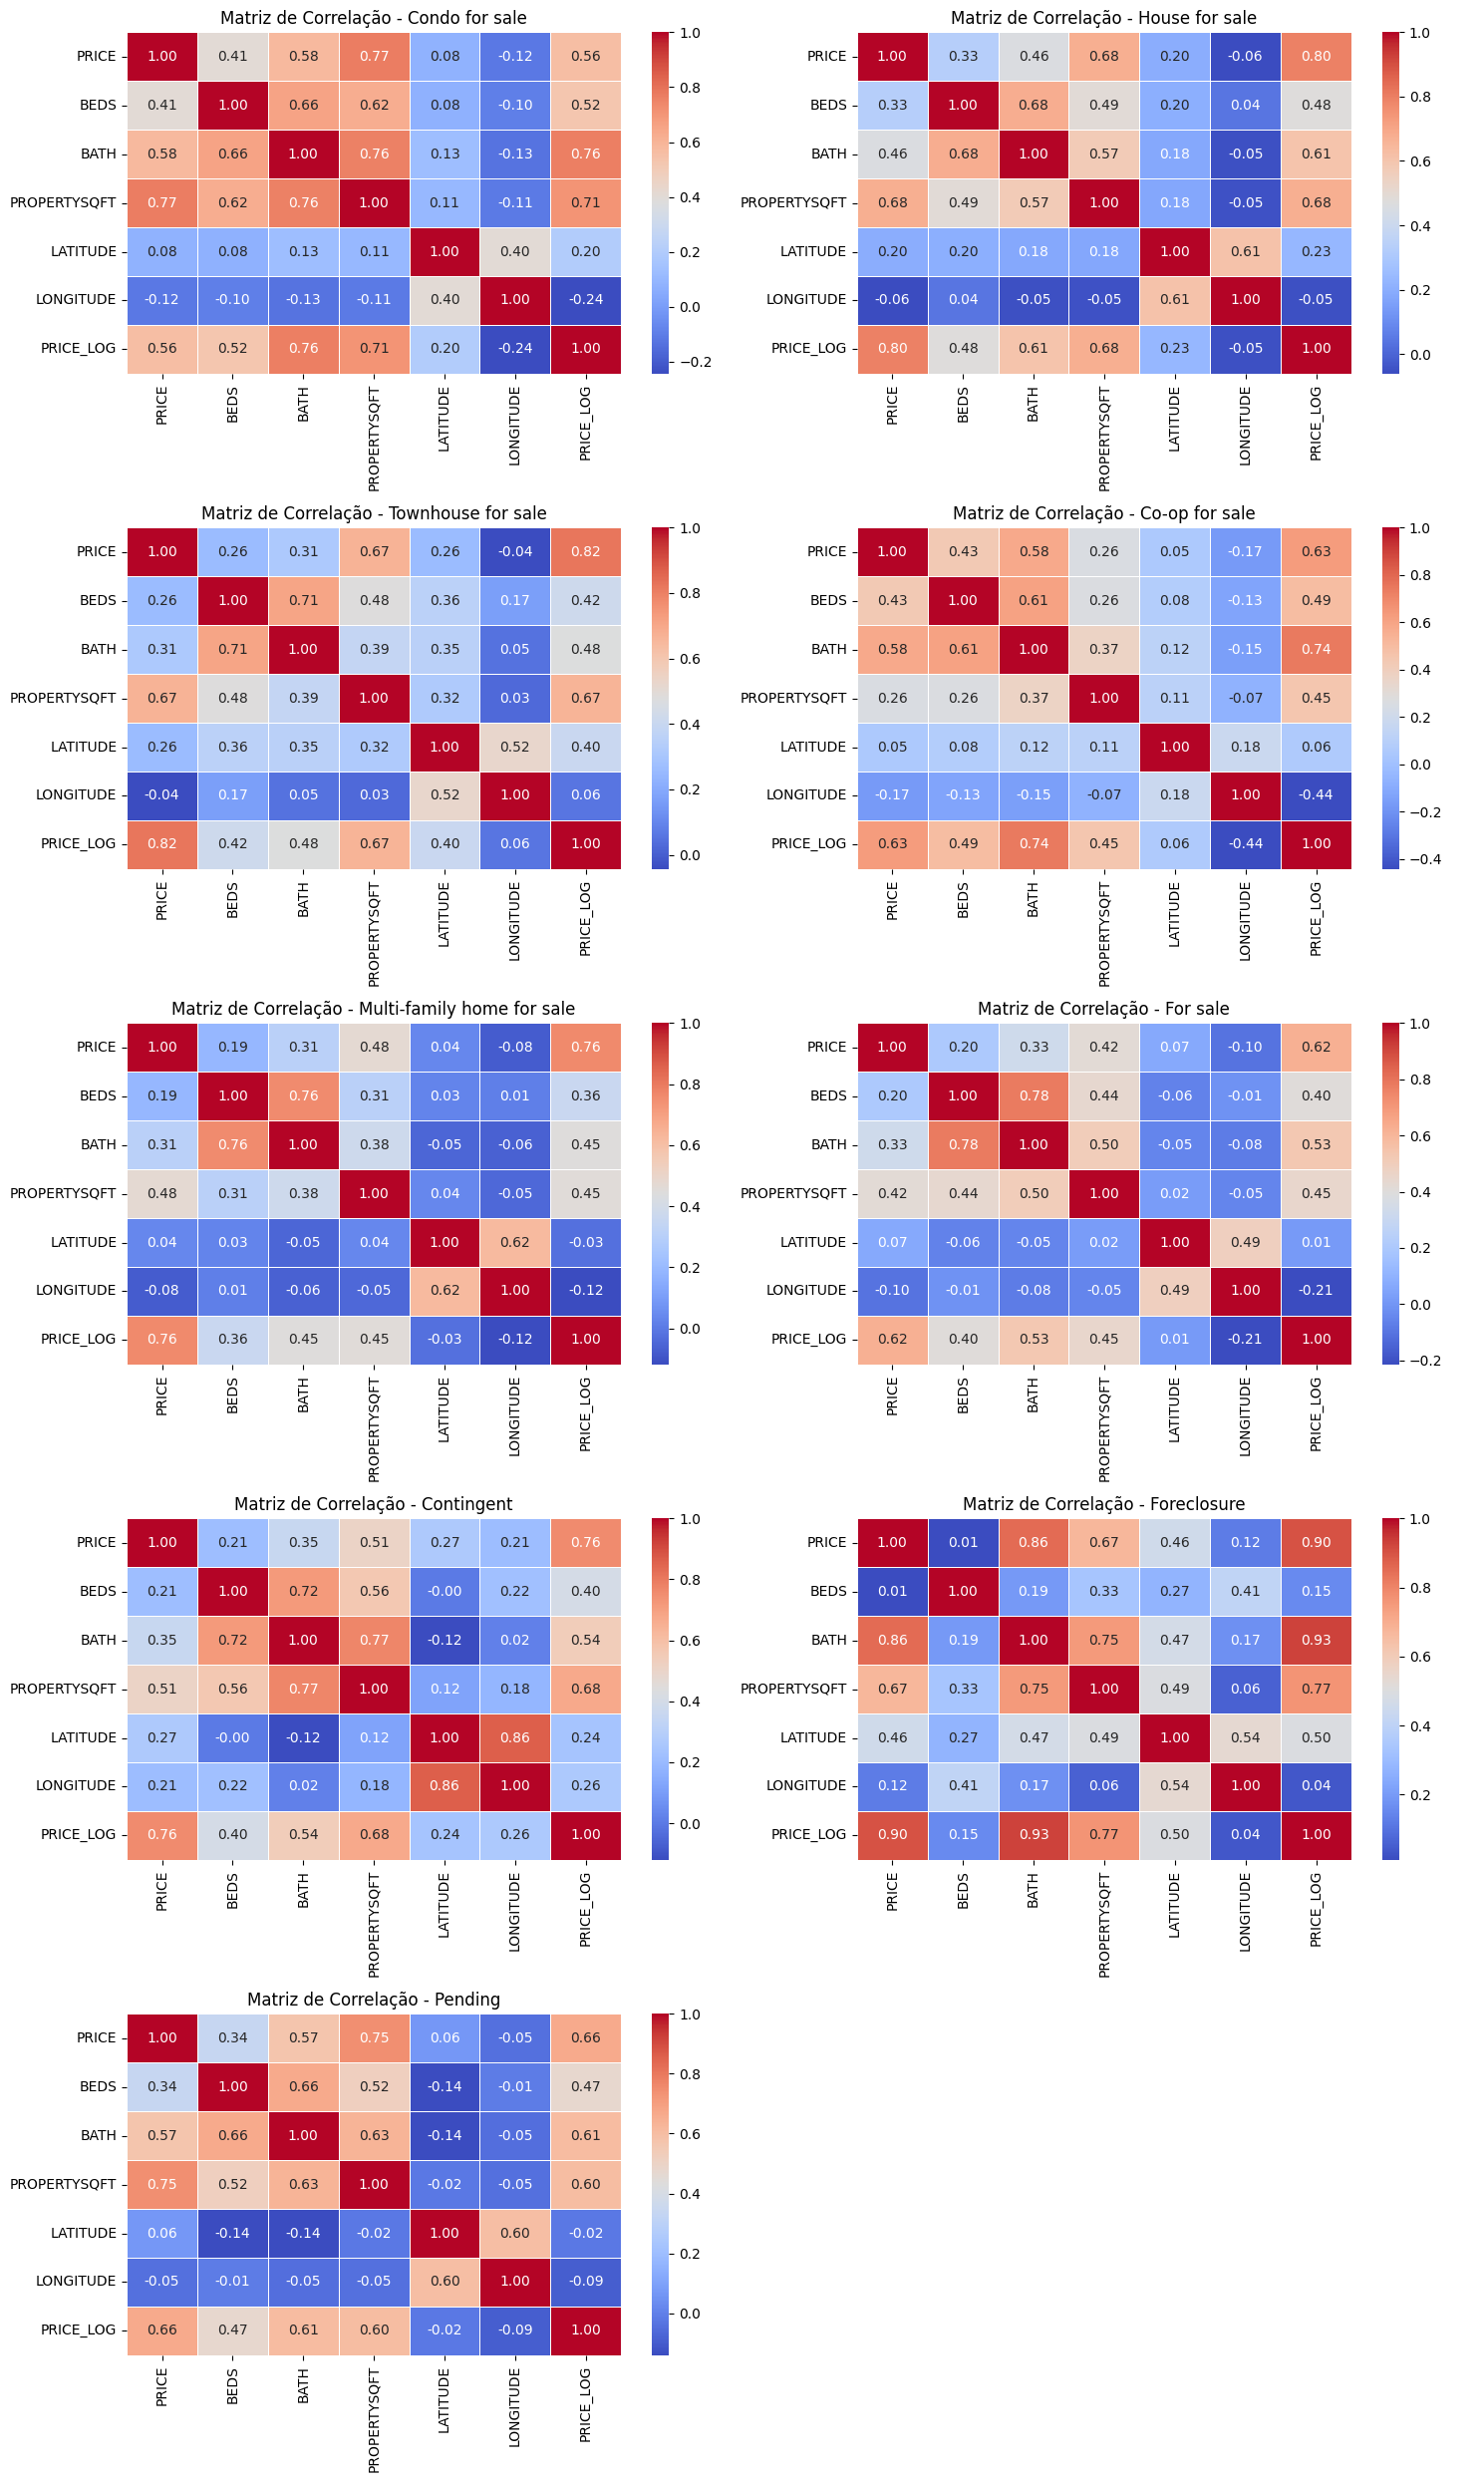

In [ ]:
tipos_excluir = ['Mobile house for sale', 'Land for sale', 'Condop for sale', 'Coming Soon']

tipos_imovel = [tipo for tipo in df_filtered['TYPE'].dropna().unique() if tipo not in tipos_excluir]

n_cols = 2
n = len(tipos_imovel)
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = np.array(axes).reshape(n_rows, n_cols)

for idx, tipo in enumerate(tipos_imovel):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]

    df_tipo = df_filtered[df_filtered['TYPE'].str.contains(tipo, case=False, na=False)]
    corr_tipo = df_tipo.select_dtypes(include='number').corr()

    if not corr_tipo.empty:
        sns.heatmap(
            corr_tipo,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt='.2f',
            ax=ax
        )
        ax.set_title(f'Matriz de Correlação - {tipo}')
    else:
        ax.axis('off')
        ax.set_title(f'Sem dados numéricos - {tipo}')

for i in range(idx + 1, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Hipóteses

## A distribuição dos preços é igual entre os grupos de metragem?

H₀: A distribuição dos preços é igual entre os grupos de metragem (a área do imóvel não afeta significativamente o preço).
Hₐ: A distribuição dos preços é diferente em pelo menos um grupo de metragem (em pelo menos um grupo a área influencia o preço).

----------------------------------------------------------------

Estatística de Levene: 80.2785
Valor-p: 5.398659128384346e-35

Como o valor ficou abaixo de 5%, utilizaremos o teste de Kruskal-Wallis
Estatísca da Kruskal-Wallis: 871.2982855263626 - P valor: 6.30930107454807e-190
A distribuição dos preços é diferente entre os grupos de metragem (rejeita-se H₀)


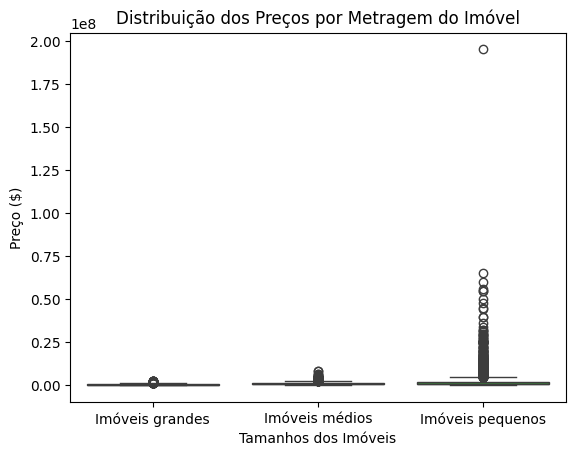

,Imóveis grandes,Imóveis médios,Imóveis pequenos
count,1.175000e+03,9.360000e+02,2.475000e+03
mean,5.708501e+05,1.259948e+06,2.797936e+06
std,3.879555e+05,1.014070e+06,6.609375e+06
min,4.950000e+04,2.000000e+05,2.494000e+03
25%,2.989440e+05,6.759712e+05,6.000000e+05
50%,4.900000e+05,8.979440e+05,1.089000e+06
75%,7.090000e+05,1.450000e+06,2.250000e+06
max,2.800000e+06,8.575000e+06,1.950000e+08


In [ ]:
bins = [0, 1200, 2184.2, 65535]
labels = ['Baixa', 'Média', 'Alta']
df_filtered['FAIXA_METRAGEM'] = pd.cut(df_filtered['PROPERTYSQFT'], bins=bins, labels=labels, include_lowest=True)

low_prices = df_filtered[df_filtered['FAIXA_METRAGEM'] == 'Baixa']['PRICE']
avg_prices = df_filtered[df_filtered['FAIXA_METRAGEM'] == 'Média']['PRICE']
high_prices = df_filtered[df_filtered['FAIXA_METRAGEM'] == 'Alta']['PRICE']

# Teste de Levene
stat, p = stats.levene(low_prices, avg_prices, high_prices)

print('H₀: A distribuição dos preços é igual entre os grupos de metragem (a área do imóvel não afeta significativamente o preço).')
print('Hₐ: A distribuição dos preços é diferente em pelo menos um grupo de metragem (em pelo menos um grupo a área influencia o preço).')
print('\n----------------------------------------------------------------\n')
print(f'Estatística de Levene: {stat:.4f}')
print(f'Valor-p: {p}')

# Kruskal-Wallis
print("\nComo o valor ficou abaixo de 5%, utilizaremos o teste de Kruskal-Wallis")
k_stats, k_val = stats.kruskal(low_prices, avg_prices, high_prices)

print(f'Estatísca da Kruskal-Wallis: { k_stats} - P valor: {k_val}')

if k_val  > 0.05:
    print("A distribuição dos preços é igual entre os grupos de metragem (falha em rejeitar H₀)")
else:
    print("A distribuição dos preços é diferente entre os grupos de metragem (rejeita-se H₀)")

df_box = pd.DataFrame({
    'Imóveis grandes': low_prices,
    'Imóveis médios': avg_prices,
    'Imóveis pequenos': high_prices
})

sns.boxplot(data=df_box)
plt.title("Distribuição dos Preços por Metragem do Imóvel")
plt.ylabel("Preço ($)")
plt.xlabel("Tamanhos dos Imóveis")
plt.show()

pd.DataFrame({
    'Imóveis grandes': low_prices,
    'Imóveis médios': avg_prices,
    'Imóveis pequenos': high_prices
}).describe()

## Os imóveis mais valorizados têm mais quartos?

H₀: A distribuição dos preços é igual entre os grupos de números de quartos (a quantidade de quartos não afeta significativamente o preço).
Hₐ: A distribuição dos preços é diferente em pelo menos um grupo de número de quartos (em pelo menos um grupo a quantidade de quartos influencia o preço).

----------------------------------------------------------------

Estatística de Levene: 97.4999
Valor-p: 3.407102303314866e-42

Como o valor ficou abaixo de 5%, utilizaremos o teste de Kruskal-Wallis
Estatísca da Kruskal-Wallis: 871.2982855263626 P valor: 6.30930107454807e-190
A quantidade de quartos dos imóveis causa diferenças significativas nos preços (rejeita-se H₀)


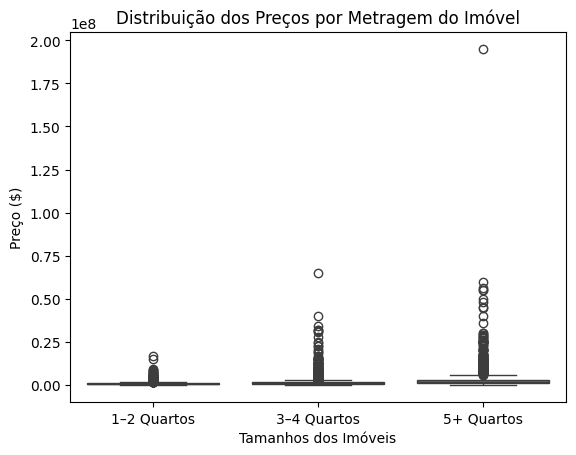

,1–2 Quartos,3–4 Quartos,5+ Quartos
count,1.729000e+03,1.941000e+03,9.160000e+02
mean,8.157938e+05,1.802158e+06,4.221020e+06
std,1.048471e+06,3.441837e+06,9.455093e+06
min,2.494000e+03,3.225000e+03,1.999990e+05
25%,3.188880e+05,5.990000e+05,9.999998e+05
50%,5.300000e+05,8.490000e+05,1.500000e+06
75%,8.750000e+05,1.495000e+06,2.995000e+06
max,1.650000e+07,6.500000e+07,1.950000e+08


In [ ]:
bins_beds = [0, 2, 4, df_filtered['BEDS'].max()]
labels_beds = ['Poucos', 'Médio', 'Muitos']
df_filtered['FAIXA_QUARTOS'] = pd.cut(df_filtered['BEDS'], bins=bins_beds, labels=labels_beds, include_lowest=True)

low_number_beds = df_filtered[df_filtered['FAIXA_QUARTOS'] == 'Poucos']['PRICE']
avg_number_beds = df_filtered[df_filtered['FAIXA_QUARTOS'] == 'Médio']['PRICE']
high_number_beds = df_filtered[df_filtered['FAIXA_QUARTOS'] == 'Muitos']['PRICE']

low_number_beds = low_number_beds.dropna()
avg_number_beds = avg_number_beds.dropna()
high_number_beds = high_number_beds.dropna()

# Teste de Levene
stat, p = stats.levene(low_number_beds, avg_number_beds, high_number_beds)

print('H₀: A distribuição dos preços é igual entre os grupos de números de quartos (a quantidade de quartos não afeta significativamente o preço).')
print('Hₐ: A distribuição dos preços é diferente em pelo menos um grupo de número de quartos (em pelo menos um grupo a quantidade de quartos influencia o preço).')
print('\n----------------------------------------------------------------\n')
print(f'Estatística de Levene: {stat:.4f}')
print(f'Valor-p: {p}')

# Kruskal-Wallis
print("\nComo o valor ficou abaixo de 5%, utilizaremos o teste de Kruskal-Wallis")
k_stats, k_val = stats.kruskal(low_prices, avg_prices, high_prices)

print(f'Estatísca da Kruskal-Wallis: { k_stats} P valor: {k_val}')

if k_val  > 0.05:
    print("A quantidade de quartos dos imóveis não causa diferenças significativas nos preços (falha em rejeitar H₀)")
else:
    print("A quantidade de quartos dos imóveis causa diferenças significativas nos preços (rejeita-se H₀)")

df_box = pd.DataFrame({
    '1–2 Quartos': low_number_beds,
    '3–4 Quartos': avg_number_beds,
    '5+ Quartos': high_number_beds
})

sns.boxplot(data=df_box)
plt.title("Distribuição dos Preços por Metragem do Imóvel")
plt.ylabel("Preço ($)")
plt.xlabel("Tamanhos dos Imóveis")
plt.show()

pd.DataFrame({
    '1–2 Quartos': low_number_beds,
    '3–4 Quartos': avg_number_beds,
    '5+ Quartos': high_number_beds
}).describe()

## O tipo de imóvel influencia nos valores?

H₀: A distribuição dos preços é a mesma entre os três tipos de imóveis (o tipo de imóvel não influencia o preço).
Hₐ: A distribuição dos preços é diferente em pelo menos um tipo de imóvel (pelo menos um tipo de imóvel influencia o preço).

----------------------------------------------------------------

Estatística de Levene: 15.9223
Valor-p: 1.5110241376932852e-07
As variâncias são significativamente diferentes entre os tipos de imóvel.

Como o valor ficou abaixo de 5%, utilizaremos o teste de Kruskal-Wallis
Estatísca da Kruskal-Wallis: 147.984747725381 P valor: 7.33703056880219e-33
Os preços dos imóveis apresentam diferenças significativas entre os tipos (rejeita-se H₀)


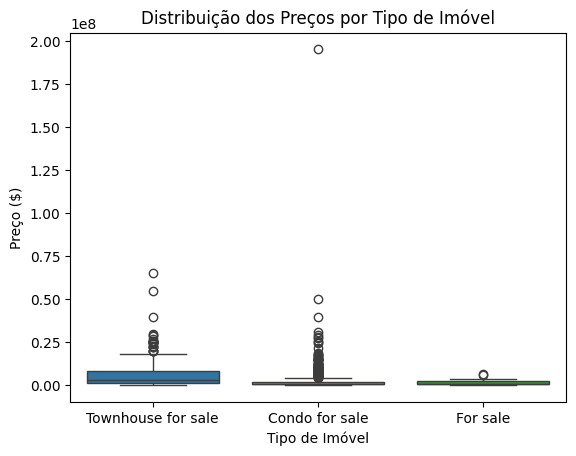

,Townhouse for sale,Condo for sale,For sale
count,2.880000e+02,8.420000e+02,2.000000e+01
mean,6.406234e+06,2.615780e+06,1.954536e+06
std,8.346999e+06,7.936657e+06,1.875709e+06
min,3.150000e+05,6.000000e+04,2.494000e+03
25%,1.283000e+06,5.750000e+05,8.110000e+05
50%,2.995000e+06,8.800000e+05,1.044500e+06
75%,8.106250e+06,2.150000e+06,2.812500e+06
max,6.500000e+07,1.950000e+08,6.500000e+06


In [ ]:
types_property = df_filtered['TYPE'].unique()

price_list_townhouses = df_filtered[df_filtered['TYPE'] == "Townhouse for sale"]['PRICE']
price_list_condo = df_filtered[df_filtered['TYPE'] == "Condo for sale"]['PRICE']
price_list_for_sale = df_filtered[df_filtered['TYPE'] == "For sale"]['PRICE']

stat, p = stats.levene(price_list_townhouses, price_list_condo, price_list_for_sale)

print('H₀: A distribuição dos preços é a mesma entre os três tipos de imóveis (o tipo de imóvel não influencia o preço).')
print('Hₐ: A distribuição dos preços é diferente em pelo menos um tipo de imóvel (pelo menos um tipo de imóvel influencia o preço).')
print('\n----------------------------------------------------------------\n')
print(f'Estatística de Levene: {stat:.4f}')
print(f'Valor-p: {p}')

if p > 0.05:
    print("Não há evidências de diferença significativa nas variâncias.")
else:
    print("As variâncias são significativamente diferentes entre os tipos de imóvel.")

# Kruskal-Wallis
print("\nComo o valor ficou abaixo de 5%, utilizaremos o teste de Kruskal-Wallis")
k_stats, k_val = stats.kruskal(price_list_townhouses, price_list_condo, price_list_for_sale)

print(f'Estatísca da Kruskal-Wallis: { k_stats} P valor: {k_val}')

if k_val  > 0.05:
    print("Os preços dos imóveis não apresentam diferenças significativas entre os tipos (falha em rejeitar H₀)")
else:
    print("Os preços dos imóveis apresentam diferenças significativas entre os tipos (rejeita-se H₀)")

df_box = pd.DataFrame({
    'Townhouse for sale': price_list_townhouses,
    'Condo for sale': price_list_condo,
    'For sale': price_list_for_sale
})

sns.boxplot(data=df_box)
plt.title("Distribuição dos Preços por Tipo de Imóvel")
plt.ylabel("Preço ($)")
plt.xlabel("Tipo de Imóvel")
plt.show()

pd.DataFrame({
    'Townhouse for sale': price_list_townhouses,
    'Condo for sale': price_list_condo,
    'For sale': price_list_for_sale
}).describe()

## Regressão Linar

### Simples

In [ ]:
X = df_filtered[['PROPERTYSQFT']]
y = df_filtered['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)

print("🔹 Regressão Linear Simples")
print(f"R²: {r2_score(y_test, y_pred_simple):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_simple)):.2f}")

🔹 Regressão Linear Simples
R²: 0.2201
RMSE: 3476927.84


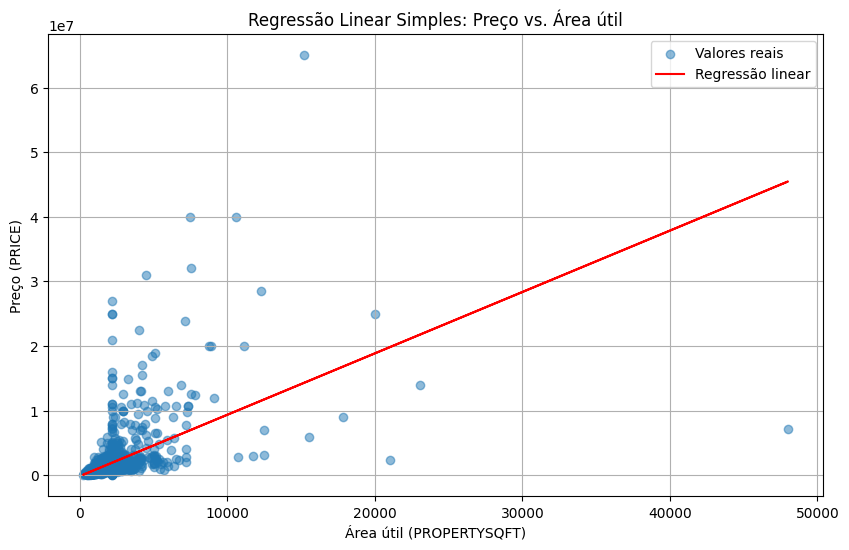

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Valores reais')
plt.plot(X_test, y_pred_simple, color='red', label='Regressão linear')
plt.title("Regressão Linear Simples: Preço vs. Área útil")
plt.xlabel("Área útil (PROPERTYSQFT)")
plt.ylabel("Preço (PRICE)")
plt.legend()
plt.grid(True)
plt.show()

### Múltipla

In [ ]:
cols = ['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH', 'COUNTY']
df_rlm = df_filtered[cols].dropna()

# Gerar variáveis dummy para COUNTY
X = pd.get_dummies(df_rlm.drop(columns='PRICE'), drop_first=True, dtype=float)
y = df_rlm['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

print("🔹 Regressão Linear Múltipla com COUNTY")
print(f"R²: {r2_score(y_test, y_pred_multi):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_multi)):.2f}")

🔹 Regressão Linear Múltipla com COUNTY
R²: 0.3282
RMSE: 3227099.79


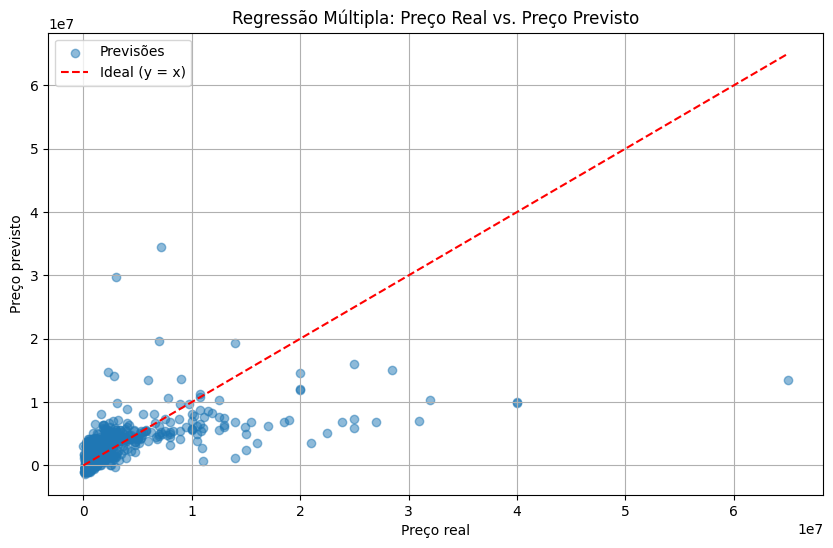

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5, label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal (y = x)')
plt.title("Regressão Múltipla: Preço Real vs. Preço Previsto")
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.legend()
plt.grid(True)
plt.show()

## Conclusão

Com base nas análises estatísticas aplicadas (teste de Levene e Kruskal-Wallis), observamos que variáveis estruturais dos imóveis, como metragem, número de quartos e banheiros, influenciam significativamente os preços. Há forte correlação entre essas variáveis e o valor dos imóveis, indicando que propriedades maiores e com mais cômodos tendem a ter preços mais elevados.

A regressão simples utilizando apenas a metragem (`PROPERTYSQFT`) como variável explicativa apresentou um R² de 0.2201, o que indica que cerca de 22% da variação nos preços dos imóveis pode ser explicada somente pela área útil. Apesar de essa relação ser positiva e significativa, o alto RMSE (cerca de US$ 3,48 milhões) evidencia que a metragem, por si só, não é suficiente para prever o preço com precisão.

Ao incluir outras variáveis relevantes, como o número de quartos (`BEDS`), banheiros (`BATH`) e a localização (`COUNTY`), o modelo múltiplo melhorou o desempenho: R² de 0.3282 e RMSE de US$ 3,23 milhões. Isso mostra que essas variáveis adicionais explicam melhor a variação dos preços, mas ainda deixam uma grande parte da variabilidade sem explicação, possivelmente relacionada a fatores não incluídos no modelo, como estado de conservação, vista, proximidade de metrô, entre outros.

Além disso, identificamos discrepâncias importantes entre localidades dentro de Nova York. Regiões como o condado de New York concentram os imóveis mais valorizados, enquanto os condados de Queens e Bronx apresentam os menores valores médios, refletindo desigualdades de mercado entre bairros.